In [1]:
import gurobi_manager

gurobi_manager.options = {
    'WLSACCESSID': '023dd6c9-cfb8-4f1b-a33c-77f3682d6631',
    'WLSSECRET': 'd7d09c3c-39c0-42dd-9f4d-4fae36615968',
    'LICENSEID': 2589125
}
gurobi_manager.options = {
    'WLSACCESSID': None,
    'WLSSECRET': None,
    'LICENSEID': None
}

In [8]:
import networkx as nx
from torch import tensor

from graph import create_graph

n = 10
incidence_matriz = tensor([[2, 3, 5, 8, 9, 9, 0, 5, 1, 3, 4, 7, 6, 0],
        [5, 9, 2, 9, 3, 8, 5, 0, 3, 1, 7, 4, 0, 6]])
# incidence_matriz = create_graph(n)

g_n = nx.from_edgelist(incidence_matriz.T.tolist())

In [9]:
from graph import milp_solve_mds

x = tensor([[1., 1., 0., 1., 0., 0., 0., 1., 1., 1.]])
s = {i for i, v in enumerate(x[0]) if v == 1}
# s = milp_solve_mds(incidence_matriz, n)
print(s)

{0, 1, 3, 7, 8, 9}


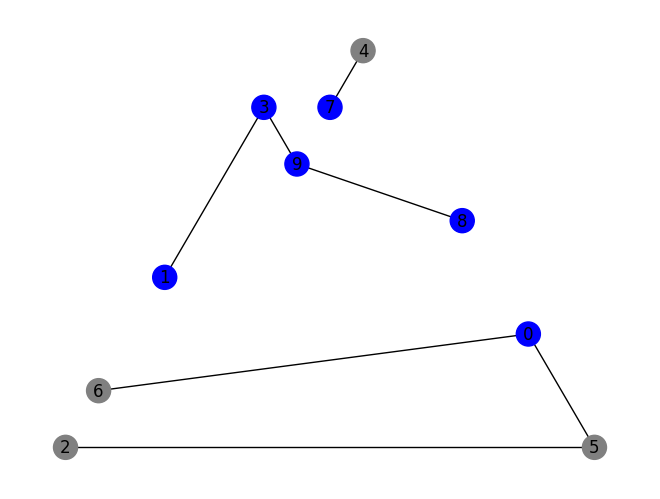

In [10]:
try:
    layout = nx.planar_layout(g_n)
except:
    layout = nx.drawing.spring_layout(g_n)

node_colors = ['blue' if n in s else 'gray' for n in g_n]
nx.draw(g_n, with_labels=True, node_color=node_colors, pos=layout)